## Part 2 - Linear Regression
Examining the relationship between a player's pass volume and completion percentage

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

Load data from StatsBomb GitHub page.

In [2]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"
comp_url = base_url + "matches/{}/{}.json"
match_url = base_url + "events/{}.json"

We will use a modification of the `parse_data` function were we extract `passes` and only the attributes `player_id` and `outcome`.

In [3]:
def parse_data(competition_id, season_id):
    matches = requests.get(url=comp_url.format(competition_id, season_id)).json()
    match_ids = [match['match_id'] for match in matches]

    all_events = []
    for match_id in match_ids:

        events = requests.get(url=match_url.format(match_id)).json()
        
        passes = [x for x in events if x['type']['name'] == "Pass"]
        for p in passes:
            attributes = {
                "player_id": p['player']['id'],
                "outcome": 0 if 'outcome' in p['pass'].keys() else 1,
            }
            all_events.append(attributes)
            
    return pd.DataFrame(all_events)

In [4]:
WC_id = 43
season_id = 3
df = parse_data(WC_id, season_id)

We will now caculate the total number of passes and pass completion percentage for each player (player_id).

In [5]:
total_passes = df.groupby("player_id")["outcome"].sum()
percentage = df.groupby("player_id")["outcome"].mean()

The total passes and pass percentage for every player can now be plotted in a scatter to give an initial thought about the correlation.

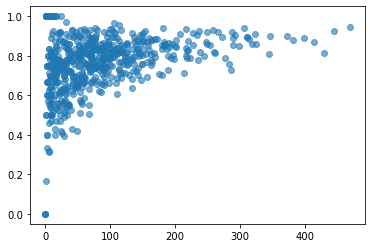

In [6]:
plt.scatter(total_passes, percentage, alpha = 0.6)
plt.show()

We will use LinearRegression from `sklearn` to peform the linear regression on the total passes and pass completion%.

In [7]:
from sklearn.linear_model import LinearRegression

Below we build a Linear Regression model, where we try to predict `percentage` with the features of the `total_passes`.

In [8]:
model = LinearRegression()
fit = model.fit([[x] for x in total_passes], percentage)
print("Coefficients: {}".format(fit.coef_))
print("Intercept: {}".format(fit.intercept_))

Coefficients: [0.00063316]
Intercept: 0.709239569309592


In [9]:
xfit = [0,500]
yfit = model.predict([[x] for x in xfit])

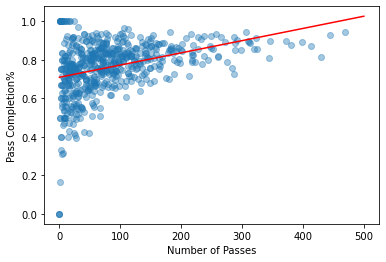

In [10]:
plt.scatter(total_passes, percentage, alpha=0.4)
plt.plot(xfit, yfit, color="r")
plt.xlabel("Number of Passes")
plt.ylabel("Pass Completion%")
plt.show()

#### In this section I will explore the dataset myself and perform LinearRegression on other interesting metrics.

In [27]:
def parse_data1(competition_id, season_id):
    matches = requests.get(url=comp_url.format(WC_id, season_id)).json()
    match_ids = [match["match_id"] for match in matches]
    
    
    all_events = []
    for match_id in match_ids:
        
        events = requests.get(url=match_url.format(match_id)).json()
        
        carries_passes = [x for x in events if x["type"]["name"] == "Carry" or x["type"]["name"] == "Pass"]
        
        for x in carries_passes:
            if x["type"]["name"] == "Pass":
                attributes = {
                    "player_id": x["player"]["id"],
                    "length": x["pass"]["length"],
                }
            elif x["type"]["name"] == "Carry":
                attributes = {
                    "player_id": x["player"]["id"],
                    "duration": x["duration"],
                } 
            all_events.append(attributes)
        
    
    
    return pd.DataFrame(all_events)

In [28]:
WC_data = parse_data1(WC_id, season_id)

In [29]:
WC_data

,player_id,length,duration
0,3043,24.331050,NaN
1,3027,NaN,1.400
2,3027,60.876926,NaN
3,5468,25.632011,NaN
4,5527,5.000000,NaN
...,...,...,...
113381,3094,NaN,1.427
113382,3094,6.403124,NaN
113383,3318,32.015620,NaN
113384,5474,NaN,1.107


In [32]:
carry_duration = WC_data.groupby("player_id")["duration"].sum()
pass_length = WC_data.groupby("player_id")["length"].sum()

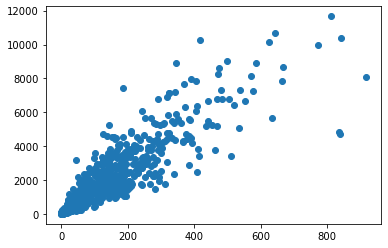

In [33]:
plt.scatter(carry_duration, pass_length)
plt.show()

In [34]:
model1 = LinearRegression()
fit1 = model.fit([[x] for x in carry_duration], pass_length)
print(fit1.coef_)
print(fit1.intercept_)

[12.34334783]
335.32318684023176


In [35]:
xfit1 = [0, 800]
yfit1 = model.predict([[x] for x in xfit1])

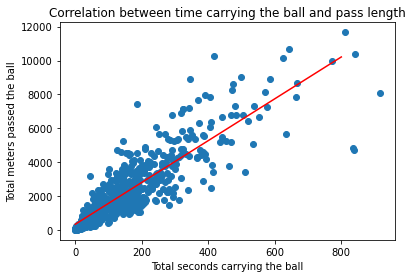

In [43]:
plt.scatter(carry_duration, pass_length)
plt.plot(xfit1, yfit1, "r")
plt.xlabel("Total seconds carrying the ball")
plt.ylabel("Total meters passed the ball")
plt.show()